In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 

In [2]:
df=pd.read_csv("card_transdata.csv")

In [3]:
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [4]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [5]:
values=df['fraud'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

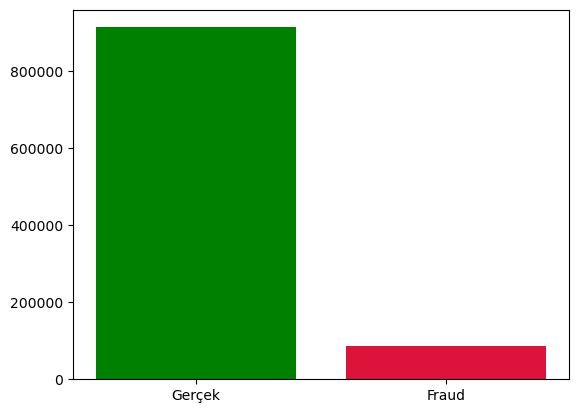

In [6]:
plt.bar(["Gerçek","Fraud"],values.values,color=["green","crimson"])
plt.show

In [7]:
y=df['fraud']
x=df.drop('fraud',axis=1)

In [8]:
df.shape

(1000000, 8)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.9)

In [10]:
tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)

In [11]:
model.score(x_test,y_test)

1.0

In [12]:
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [13]:
model.predict([[900,850,2,1,1,1,0]])

C:\Users\varun\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [14]:
reg=LogisticRegression()
model=reg.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\varun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95969

In [15]:
model.coef_

array([[  0.01569061,   0.02588712,   0.88383127,  -0.6749135 ,
         -1.11199667, -13.10295667,   7.05791577]])

In [17]:
x_train,x_test,Y_train,Y_test=train_test_split(x,y,random_state=42,train_size=0.9)

In [18]:
mm=MinMaxScaler()
X=mm.fit_transform(x)

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,train_size=0.9)

In [20]:
log=LogisticRegression()
model=log.fit(X_train,Y_train)

In [21]:
model.score(X_test,Y_test)


0.94617

In [22]:
model.coef_

array([[ 83.3664316 ,  39.34345105, 148.14386182,  -0.30744962,
         -0.75667956,  -8.13718805,   4.18924148]])

In [23]:
x_train.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')

In [24]:
fraud=df[df['fraud']==1]

In [25]:
fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [26]:
x_fraud=mm.transform(fraud.drop("fraud",axis=1))
y_fraud=fraud['fraud']

In [27]:
model.score(x_fraud,y_fraud)

0.4174113016715673

In [28]:
tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)

In [29]:
X_fraud=fraud.drop('fraud',axis=1)
Y_fraud=fraud['fraud']
model.score(X_fraud,Y_fraud)

1.0

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
from tkinter import *
from tkinter import messagebox


df=pd.read_csv("card_transdata.csv")
print(df.head())  



window = Tk()
window.title("Credit Card Fraud Detection")

# GUI

def predict_fraud():
    try:
        
        distance_from_home = float(distance_from_home_entry.get())
        distance_from_last_transaction = float(distance_from_last_transaction_entry.get())
        ratio_to_median_purchase_price = float(ratio_to_median_purchase_price_entry.get())
        repeat_retailer = int(repeat_retailer_entry.get())
        used_chip = int(used_chip_entry.get())
        used_pin_number = int(used_pin_number_entry.get())
        online_order = int(online_order_entry.get())
        
        print(f"Inputs: {distance_from_home}, {distance_from_last_transaction}, {ratio_to_median_purchase_price}, {repeat_retailer}, {used_chip}, {used_pin_number}, {online_order}")  
        
        
        input_data = mm.transform([[distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order]])
        
       
        prediction = model.predict(input_data)
        
      
        messagebox.showinfo("Prediction", f"The prediction result is: {'Fraudulent' if prediction[0] == 1 else 'Non-Fraudulent'}")
        
    except ValueError:
        messagebox.showerror("Error", "Please enter valid input values.")


distance_from_home_label = Label(window, text="Distance from Home:")
distance_from_home_label.grid(row=0, column=0)
distance_from_home_entry = Entry(window)
distance_from_home_entry.grid(row=0, column=1)



predict_button = Button(window, text="Predict", command=predict_fraud)
predict_button.grid(row=7, columnspan=2)


window.mainloop()
